# 名目GDP

In [1]:
import pandas as pd

In [2]:
gdp_org = pd.read_excel("opendata/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_2445330.xls","Data",header=3)

In [3]:
indicator_name = gdp_org["Indicator Name"].unique()[0]

In [4]:
countries = gdp_org.iloc[:,:2]

In [5]:
gdps = gdp_org.iloc[:,4:].stack(dropna=False).reset_index().rename(columns={"level_0":"country_index","level_1":"year",0:indicator_name})

In [6]:
ngdps = pd.merge(countries,gdps,left_index=True,right_on="country_index")
del ngdps["country_index"]
ngdps.rename(columns={indicator_name:"GDP"},inplace=True)
ngdps

,Country Name,Country Code,year,GDP
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
...,...,...,...,...
16099,Zimbabwe,ZWE,2016,2.054868e+10
16100,Zimbabwe,ZWE,2017,2.204090e+10
16101,Zimbabwe,ZWE,2018,2.431156e+10
16102,Zimbabwe,ZWE,2019,2.144076e+10


In [7]:
# 最新年のGDPが全部NAなら削除
if ngdps.loc[ngdps.year==ngdps.year.max()]["GDP"].isna().all(axis=0):
    ngdps.drop(ngdps.loc[ngdps.year==ngdps.year.max()].index,inplace=True)

In [8]:
latest_year = ngdps["year"].max()
latest_year

'2019'

In [9]:
# GDPの多い順に表示
ngdps.loc[ngdps.year==latest_year].sort_values("GDP",ascending=False,na_position="last")

,Country Name,Country Code,year,GDP
15736,World,WLD,2019,8.773457e+13
5732,High income,HIC,2019,5.514063e+13
10978,OECD members,OED,2019,5.369937e+13
12015,Post-demographic dividend,PST,2019,5.076992e+13
6220,IDA & IBRD total,IBT,2019,3.385200e+13
...,...,...,...,...
14272,Turkmenistan,TKM,2019,NaN
14455,Middle East & North Africa (IDA & IBRD countries),TMN,2019,NaN
15431,"Venezuela, RB",VEN,2019,NaN
15492,British Virgin Islands,VGB,2019,NaN


## 前年比

In [10]:
ngdps

,Country Name,Country Code,year,GDP
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
...,...,...,...,...
16098,Zimbabwe,ZWE,2015,1.996312e+10
16099,Zimbabwe,ZWE,2016,2.054868e+10
16100,Zimbabwe,ZWE,2017,2.204090e+10
16101,Zimbabwe,ZWE,2018,2.431156e+10


In [11]:
ngdps["前年比"] = ngdps["GDP"].pct_change()
# 最初の年はNAにする
import numpy as np
ngdps.loc[ngdps.year==ngdps.year.min()] = np.nan
ngdps

,Country Name,Country Code,year,GDP,前年比
0,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1961,NaN,NaN
2,Aruba,ABW,1962,NaN,NaN
3,Aruba,ABW,1963,NaN,NaN
4,Aruba,ABW,1964,NaN,NaN
...,...,...,...,...,...
16098,Zimbabwe,ZWE,2015,1.996312e+10,0.023985
16099,Zimbabwe,ZWE,2016,2.054868e+10,0.029332
16100,Zimbabwe,ZWE,2017,2.204090e+10,0.072619
16101,Zimbabwe,ZWE,2018,2.431156e+10,0.103020


In [12]:
world_gdp = ngdps.loc[ngdps["Country Code"]=="WLD"]
world_gdp

,Country Name,Country Code,year,GDP,前年比
15678,World,WLD,1961,1.425115e+12,0.040652
15679,World,WLD,1962,1.530069e+12,0.073646
15680,World,WLD,1963,1.648305e+12,0.077275
15681,World,WLD,1964,1.805674e+12,0.095473
15682,World,WLD,1965,1.966277e+12,0.088944
15683,World,WLD,1966,2.133345e+12,0.084967
15684,World,WLD,1967,2.270952e+12,0.064503
15685,World,WLD,1968,2.451449e+12,0.079481
15686,World,WLD,1969,2.704652e+12,0.103287
15687,World,WLD,1970,2.961059e+12,0.094802


In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


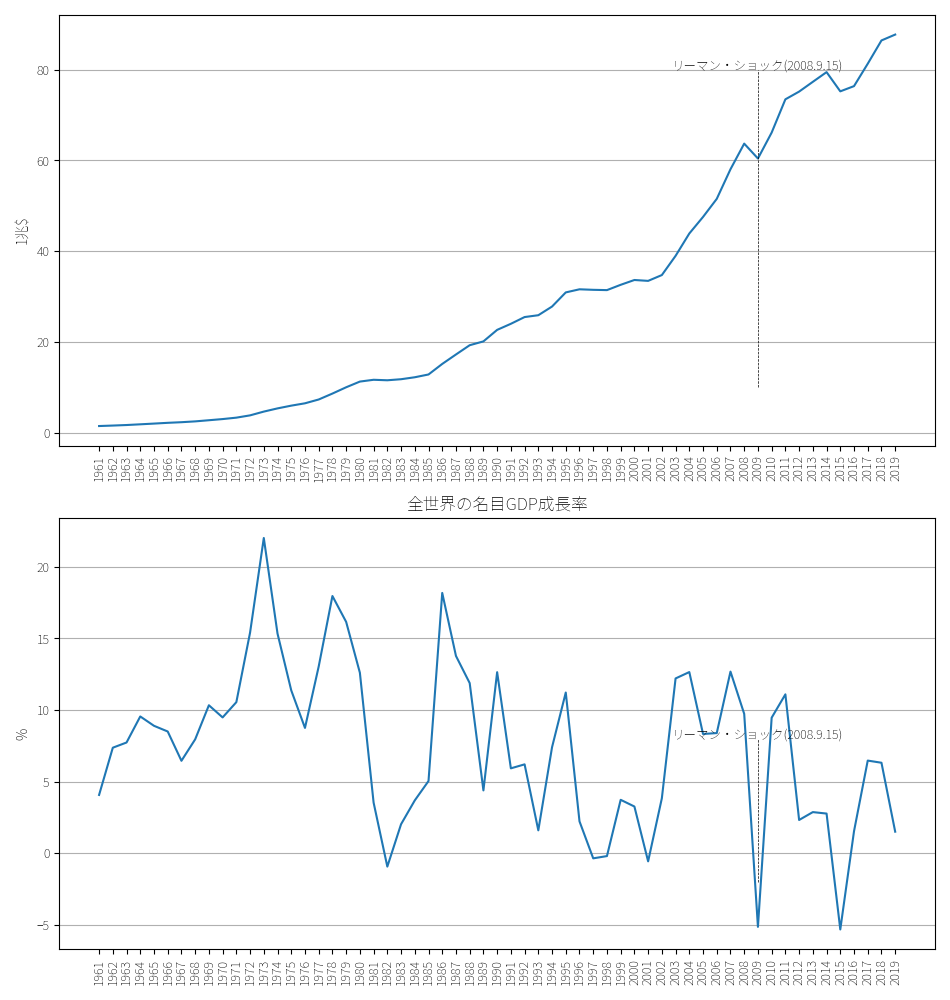

In [14]:
fig = plt.figure(figsize=(9.5,10))
plt.title("全世界の名目GDP")
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("1兆$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = world_gdp
plt.plot(world_gdp["year"], world_gdp["GDP"]/1000/1000/1000/1000)
plt.plot(["2009","2009"],[10,80], 'k--', lw=0.5)
plt.text("2009",80,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("全世界の名目GDP成長率")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = world_gdp
plt.plot(world_gdp["year"], world_gdp["前年比"]*100)
plt.plot(["2009","2009"],[-2,8], 'k--', lw=0.5)
plt.text("2009",8,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")

plt.tight_layout()

## 国の読み込み

In [15]:
c_org = pd.read_excel("opendata/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_2445330.xls","Metadata - Countries")

In [16]:
countries = c_org.dropna(subset=["Region","IncomeGroup"],how="any")
countries

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [17]:
regions = c_org.Region.dropna().unique()
regions

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [18]:
c_gdps = pd.merge(countries,ngdps,on="Country Code",how="inner").drop("TableName",axis=1)
#gdps.join(countries,on="Country Code",how="inner")

In [19]:
print(len(countries))
print(len(c_gdps["Country Name"].unique()))

217
217


## 世界TOP10

In [20]:
gdp_top10_c = pd.DataFrame(c_gdps.loc[c_gdps.year==latest_year].sort_values("GDP", ascending=False).head(10)[["Country Code","Country Name"]])
c_gdps_top10 = c_gdps[c_gdps["Country Code"].isin(gdp_top10_c["Country Code"])]
c_gdps.iloc[gdp_top10_c.index]


,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,year,GDP,前年比
12035,USA,North America,High income,NaN,United States,2019,2.143323e+13,0.041451
2182,CHN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,2019,1.427994e+13,0.027717
5840,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2019,5.081770e+12,0.025624
3008,DEU,Europe & Central Asia,High income,NaN,Germany,2019,3.861124e+12,-0.025896
5309,IND,South Asia,Lower middle income,Fiscal year end: March 31; reporting period fo...,India,2019,2.868929e+12,0.057411
4070,GBR,Europe & Central Asia,High income,NaN,United Kingdom,2019,2.829108e+12,-0.011032
3834,FRA,Europe & Central Asia,High income,The following irrevocable euro conversion rate...,France,2019,2.715518e+12,-0.025950
5663,ITA,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Italy,2019,2.003576e+12,-0.042059
1592,BRA,Latin America & Caribbean,Upper middle income,NaN,Brazil,2019,1.839758e+12,-0.024251
1946,CAN,North America,High income,Fiscal year end: March 31; reporting period fo...,Canada,2019,1.736426e+12,0.011748


<IPython.core.display.Javascript object>


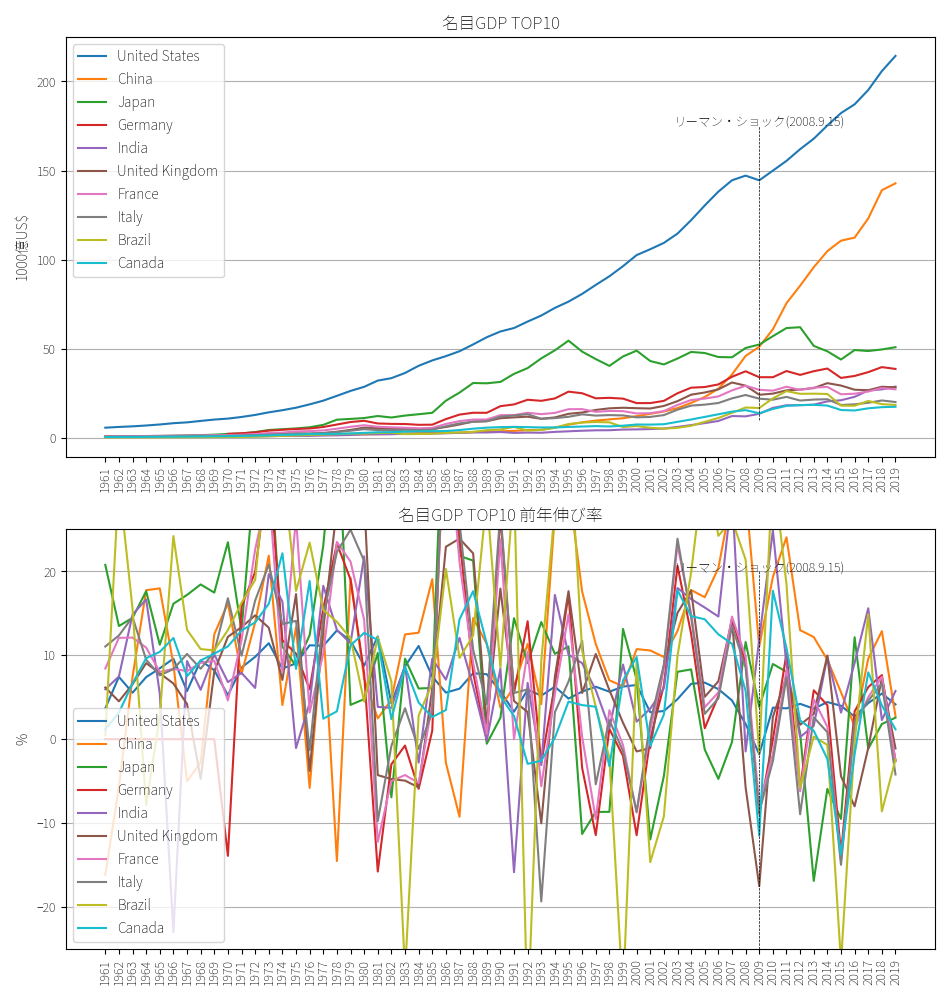

In [21]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.title("名目GDP TOP10")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("1000億US$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = c_gdps_top10
years = chart_data.year.unique()
for c in gdp_top10_c["Country Name"]:
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"GDP"]/1000/1000/1000/100,label=c)
plt.plot(["2009","2009"],[10,175], 'k--', lw=0.5)
plt.text("2009",175,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("名目GDP TOP10 前年伸び率")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.ylim(-25,25)
plt.grid(axis="y")
chart_data = c_gdps_top10
years = chart_data.year.unique()
for c in gdp_top10_c["Country Name"]:
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"前年比"]*100,label=c)
plt.plot(["2009","2009"],[-25,20], 'k--', lw=0.5)
plt.text("2009",20,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()

plt.tight_layout()

## 日本

In [22]:
jpn_gdp = c_gdps.loc[c_gdps["Country Code"]=="JPN"]
jpn_gdp.tail(10)

,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,year,GDP,前年比
5831,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2010,5.700098e+12,0.089597
5832,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2011,6.157460e+12,0.080237
5833,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2012,6.203213e+12,0.007431
5834,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2013,5.155717e+12,-0.168863
5835,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2014,4.850414e+12,-0.059217
5836,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2015,4.389476e+12,-0.095031
5837,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2016,4.922538e+12,0.121441
5838,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2017,4.866864e+12,-0.011310
5839,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2018,4.954807e+12,0.018070
5840,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2019,5.081770e+12,0.025624


## 人口あたりの計算

### 人口の読み込み

In [24]:
pop_org = pd.read_excel("population/opendata/world/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_org.head(10)

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814818.913,824003.512,833720.173,...,1239557.448,1244114.531,1248453.53,1252615.112,1256622.188,1260478.667,1264146.38,1267558.904,1270630.32,1273304.261
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1721612.105,1760030.715,1797141.517,...,5801636.72,5881713.426,5962128.511,6042675.647,6123174.779,6203543.267,6283712.52,6363532.209,6442837.885,6521494.468
4,5,Estimates,Least developed countries,d,941,Development Group,902,195427.785,199180.385,203015.198,...,856471.437,876867.234,897793.439,919222.955,941131.317,963519.718,986385.402,1009691.252,1033388.868,1057438.163
5,6,Estimates,"Less developed regions, excluding least develo...",e,934,Development Group,902,1526184.32,1560850.33,1594126.319,...,4945165.283,5004846.192,5064335.072,5123452.692,5182043.462,5240023.549,5297327.118,5353840.957,5409449.017,5464056.305
6,7,Estimates,"Less developed regions, excluding China",NaN,948,Development Group,1803,1157420.006,1179932.723,1203962.856,...,4394312.896,4466549.236,4539157.446,4612004.827,4684981.353,4758019.348,4831087.287,4904154.599,4977203.709,5050207.589
7,8,Estimates,Land-locked Developing Countries (LLDC),f,1636,Special other,1803,103803.462,105870.275,108079.453,...,430709.335,441057.032,451698.913,462623.551,473816.858,485276.858,496988.246,508906.035,520972.691,533143.398
8,9,Estimates,Small Island Developing States (SIDS),g,1637,Special other,1803,23771.12,24209.068,24684.57,...,66034.534,66778.724,67490.682,68180.358,68855.52,69514.961,70157.518,70791.836,71428.827,72076.098
9,10,Estimates,World Bank income groups,NaN,1802,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [28]:
#cnt_org = pd.read_excel("world/country-code-2020-iso-obp.xlsx")
#cnt_org.head(10)
